Linear regression model: Coefficients = [[-0.01365085  1.04143505]]  intercept = [4.30564464]
 y = -0.013650846917261693 * x**2 + 1.041435054216601 * x + [4.30564464]


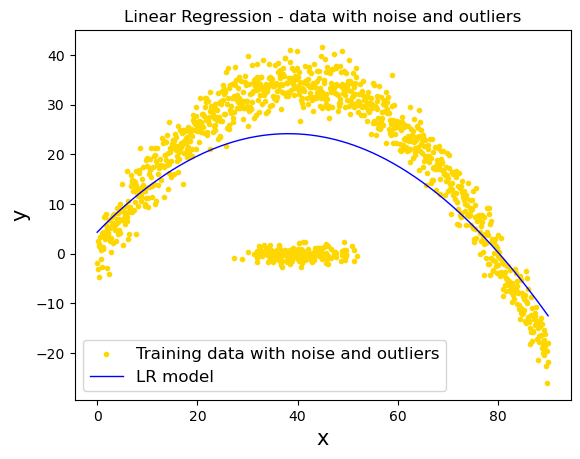

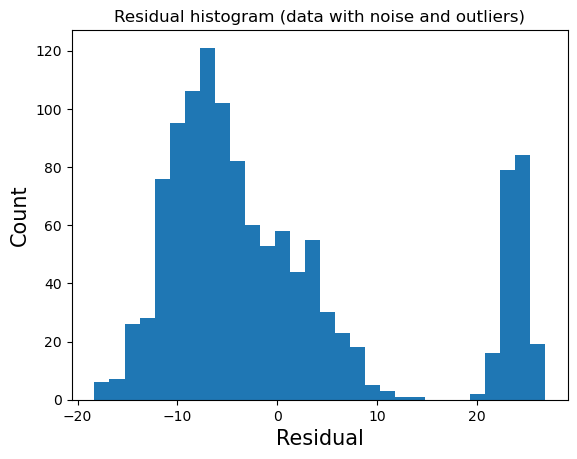

When x = [1600.   40.], y = [24.12169175]


In [201]:
%run LinearRegression_ParabolicTest01.py

In [202]:
from matplotlib import pyplot as plt
import numpy as np
import csv

def ReadCSV(filename):
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        x_mylist = []
        y_mylist = []
        for row in csv_reader:
            x_mylist.append( float(row[0]) )
            y_mylist.append( float(row[1]) )
    return x_mylist, y_mylist

# ******************
_x, _y = ReadCSV('ParabolaWithNoiseOutlier.csv')
number_of_samples = len(_x)
x_pos = np.array(_x)
x_pos = x_pos.reshape(number_of_samples, 1)
y_pos = np.array(_y)
y_pos = y_pos.reshape(number_of_samples, 1)

# *************************** 

t1 = x_pos ** 2
t1 = t1.reshape(number_of_samples, 1)
t2 = x_pos.reshape(number_of_samples, 1)
K = np.concatenate( (t1, t2), axis=1 )

In [203]:
# Feat: RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor().fit(K, y_pos)
print( f'RANSAC regression model (with noise and outliers): Coefficients = {ransac.estimator_.coef_}  intercept = {ransac.estimator_.intercept_}' )
# s=ut+(1/2)at^2
print( f's = {ransac.estimator_.intercept_} * t + (1/2) {ransac.estimator_.coef_[0]} * t^2' )

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

RANSAC regression model (with noise and outliers): Coefficients = [[-0.02143508  1.69980895]]  intercept = [0.66360495]
s = [0.66360495] * t + (1/2) [-0.02143508  1.69980895] * t^2


Linear regression model: Coefficients = [[-0.02143508  1.69980895]]  intercept = [0.66360495]
 y = -0.021435080064927794 * x**2 + 1.6998089501377944 * x + [0.66360495]


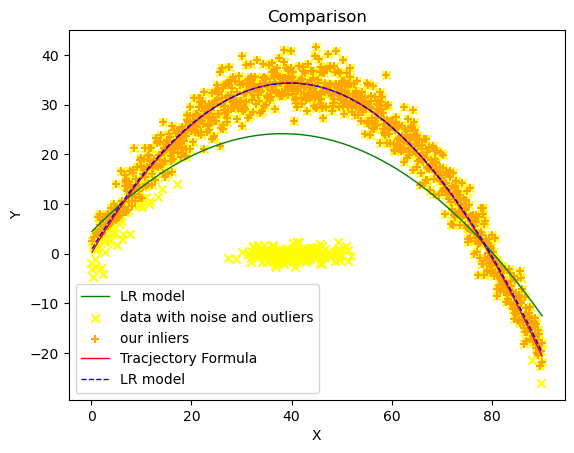

In [204]:
# Extract all the inlier points using the inlier_mask produced by RANSACRegressor
our_inlier_x = x_pos[ inlier_mask ]
our_inlier_y = y_pos[ inlier_mask ]

number_of_samples = len(our_inlier_x)
inlier_t1 = our_inlier_x ** 2
inlier_t1 = inlier_t1.reshape(number_of_samples, 1)
inlier_t2 = our_inlier_x.reshape(number_of_samples, 1)
inlier_K = np.concatenate( (inlier_t1, inlier_t2), axis=1 )

# ******************************
# Use linear regressor to fit a line with our inliers
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(inlier_K, our_inlier_y)

print( f'Linear regression model: Coefficients = {reg.coef_}  intercept = {reg.intercept_}' )
print( f' y = {reg.coef_[0][0]} * x**2 + {reg.coef_[0][1]} * x + {reg.intercept_}' )
# ******************************
#Draw the fitted curve
min_x = min(our_inlier_x)
max_x = max(our_inlier_x)
numOfPoint = 3*len(our_inlier_x)
temp_x = np.linspace(min_x, max_x, num = numOfPoint)
xpoints = temp_x.reshape(numOfPoint, 1)
xxpoints = xpoints ** 2
H = np.concatenate( (xxpoints, xpoints), axis=1)
prediction = reg.predict(H)


number_of_samples_org = len(_x)
x_pos_org = np.array(_x)
x_pos_org = x_pos_org.reshape(number_of_samples_org, 1)
y_pos_org = np.array(_y)
y_pos_org = y_pos_org.reshape(number_of_samples_org, 1)

t1_org = x_pos_org ** 2
t1_org = t1_org.reshape(number_of_samples_org, 1)
t2_org = x_pos_org.reshape(number_of_samples_org, 1)
K_org = np.concatenate( (t1_org, t2_org), axis=1 )

min_x_org = min(x_pos_org)
max_x_org = max(x_pos_org)

reg_org = LinearRegression().fit(K_org, y_pos_org)

numOfPoint_org = 300
temp_x_org = np.linspace(min_x_org, max_x_org, num = numOfPoint_org)
xpoints_org = temp_x.reshape(numOfPoint, 1)
xxpoints_org = xpoints ** 2
H_org = np.concatenate( (xxpoints_org, xpoints_org), axis=1)
prediction_org = reg_org.predict(H_org)

plt.plot(xpoints, prediction_org, color="green", linewidth=1, label="LR model")



plt.scatter(
   x_pos, y_pos, color="yellow", marker="x", label="data with noise and outliers"
)

plt.scatter(
   our_inlier_x, our_inlier_y, color="orange", marker="+", label="our inliers"
)

# plot the true theoretical trajectory mode (y = x * tan(theta) - (g * x^2) / (2 * v0^2 * cos(theta)^2)))
v0 = 30
g = 9.81
theta = 60
plt.plot(xpoints, xpoints * np.tan(np.radians(theta)) - (g * xpoints**2) / (2 * v0**2 * np.cos(np.radians(theta))**2), color="red", linewidth=1, label="Tracjectory Formula")

# def y(x_true, theta_true, g_true, v0_true):
#    return x_true * np.tan(theta_true) - (g_true * x_true**2) / (2 * v0_true**2 * np.cos(theta_true)**2)
# plt.plot(xpoints, y(np.concatenate( (xxpoints, xpoints), axis=1), np.radians(45), 9.81, 10), color="green", linewidth=1, label="True model")

plt.plot(xpoints, prediction, color="blue", linewidth=1, label="LR model", linestyle='dashed')
plt.legend(loc='lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison')
plt.show()

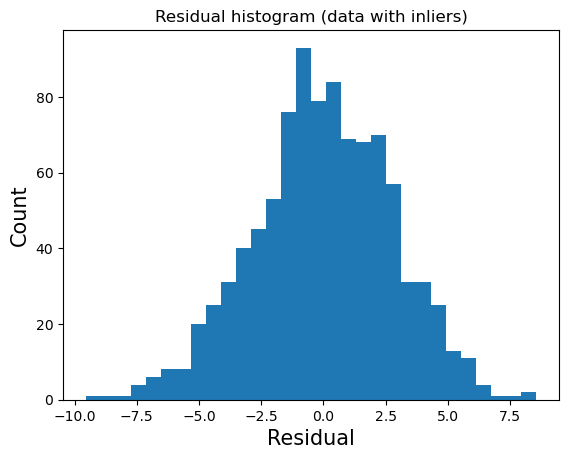

In [205]:
prediction = reg.predict( inlier_K )
residual = prediction - our_inlier_y
plt.hist(residual, bins=30)
plt.xlabel('Residual', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Residual histogram (data with inliers)')
plt.show()

In [206]:
# Predict y value given x value of User Input xxxxxxxxxxxx40.0
x_value = int(input('Enter x value: '))
x_test = np.array([[x_value ** 2, x_value],])
y_result = reg.predict(x_test)

print(f'Prediction: When x = {x_value}, y = {y_result[0][0]}')
print(f'Real value: When x = {x_value}, y = {x_value * np.tan(np.radians(theta)) - (g * x_value**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)}')

Prediction: When x = 40, y = 34.359834852099375
Real value: When x = 40, y = 34.40203230275509


In [207]:
# make predicion and real value into pandas dataframe for comparison
import pandas as pd
min_i = 0
max_i = 86
for i in range(min_i,max_i):
    x_test = np.array([[i ** 2, i],])
    y_result = reg.predict(x_test)
    y_real = i * np.tan(np.radians(theta)) - (g * i**2) / (2 * v0**2 * np.cos(np.radians(theta))**2)
    if i == 0:
        df = pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})
    else:
        df = pd.concat([df, pd.DataFrame({'x': [i], 'y_pred': [y_result[0][0]], 'y_real': [y_real]})])
df.set_index('x', inplace=True)
df['y_diff'] = (df['y_pred'] - df['y_real'])
df['y_diff_absolute'] = df['y_diff'].abs()
df['percentage_error'] = ((df['y_real'] - df['y_pred']) / df['y_real']) * 100
df['absolute_percentage_error'] = df['percentage_error'].abs()
# display whole dataframe
print(df.to_string())
df.to_csv('comparison.csv')

       y_pred     y_real    y_diff  y_diff_absolute  percentage_error  absolute_percentage_error
x                                                                                               
0    0.663605   0.000000  0.663605         0.663605              -inf                        inf
1    2.341979   1.710251  0.631728         0.631728        -36.937741                  36.937741
2    3.977483   3.376902  0.600581         0.600581        -17.784969                  17.784969
3    5.570116   4.999952  0.570164         0.570164        -11.403382                  11.403382
4    7.119879   6.579403  0.540476         0.540476         -8.214670                   8.214670
5    8.626773   8.115254  0.511519         0.511519         -6.303175                   6.303175
6   10.090796   9.607505  0.483291         0.483291         -5.030348                   5.030348
7   11.511949  11.056156  0.455793         0.455793         -4.122527                   4.122527
8   12.890231  12.461206  0.42

In [208]:
display(df['y_diff_absolute'].describe())
display(df['absolute_percentage_error'].describe())

count    86.000000
mean      0.194726
std       0.187902
min       0.002450
25%       0.040604
50%       0.120159
75%       0.327189
max       0.663605
Name: y_diff_absolute, dtype: float64

count    86.000000
mean           inf
std            NaN
min       0.008557
25%       0.122793
50%       0.505317
75%       2.810178
max            inf
Name: absolute_percentage_error, dtype: float64

In [209]:
print(df.sort_values(by=['y_diff_absolute'], ascending=False).to_string())

       y_pred     y_real    y_diff  y_diff_absolute  percentage_error  absolute_percentage_error
x                                                                                               
0    0.663605   0.000000  0.663605         0.663605              -inf                        inf
1    2.341979   1.710251  0.631728         0.631728        -36.937741                  36.937741
2    3.977483   3.376902  0.600581         0.600581        -17.784969                  17.784969
3    5.570116   4.999952  0.570164         0.570164        -11.403382                  11.403382
85  -9.721088 -10.280681  0.559594         0.559594          5.443157                   5.443157
4    7.119879   6.579403  0.540476         0.540476         -8.214670                   8.214670
84  -7.798368  -8.328532  0.530164         0.530164          6.365635                   6.365635
5    8.626773   8.115254  0.511519         0.511519         -6.303175                   6.303175
83  -5.918519  -6.419983  0.50

In [210]:
print(df.sort_values(by=['absolute_percentage_error'], ascending=False).to_string())

       y_pred     y_real    y_diff  y_diff_absolute  percentage_error  absolute_percentage_error
x                                                                                               
0    0.663605   0.000000  0.663605         0.663605              -inf                        inf
79   1.172177   0.778214  0.393964         0.393964        -50.624074                  50.624074
80  -0.536191  -0.955935  0.419744         0.419744         43.909237                  43.909237
1    2.341979   1.710251  0.631728         0.631728        -36.937741                  36.937741
2    3.977483   3.376902  0.600581         0.600581        -17.784969                  17.784969
81  -2.287430  -2.733685  0.446254         0.446254         16.324275                  16.324275
78   2.837676   2.468763  0.368913         0.368913        -14.943231                  14.943231
3    5.570116   4.999952  0.570164         0.570164        -11.403382                  11.403382
82  -4.081539  -4.555034  0.47